In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
data_true = pd.read_csv('/content/true.csv')
data_fake = pd.read_csv('/content/fake.csv')

In [10]:
data_true

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [11]:
data_fake

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [13]:
data_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [12]:
data_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [14]:
data_fake["label"]=0
data_true["label"]=1

In [15]:
data = pd.concat([data_true,data_fake],axis=0)

In [16]:
data

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [17]:
data.dropna(inplace=True)

In [18]:
data['text'] = data.title + " " + data.text

In [19]:
data = data[['text' , 'label']]
data.head()

,text,label
0,"As U.S. budget fight looms, Republicans flip t...",1
1,U.S. military to accept transgender recruits o...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,1
3,FBI Russia probe helped by Australian diplomat...,1
4,Trump wants Postal Service to charge 'much mor...,1


Data Preprocessing

In [21]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [22]:
def clean_text(text):
    text = text.lower()
    text = "".join([ch for ch in text if ch not in string.punctuation])
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return " ".join(words)

In [26]:
data["text"][:1000].apply(clean_text)

,text
0,us budget fight looms republicans flip fiscal ...
1,us military accept transgender recruits monday...
2,senior us republican senator let mr mueller jo...
3,fbi russia probe helped australian diplomat ti...
4,trump wants postal service charge much amazon ...
...,...
995,house panels seek documents puerto rico utilit...
996,trump releases jfk files blocks others pressur...
997,tillerson tells myanmar army chief us concerne...
998,exclusive advising trump 2016 excia chief prop...


In [27]:
data.loc[:, "text"] = data["text"].apply(clean_text)

Converting Text to Numeric Values using TF-IDF

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [29]:
vectorizer = TfidfVectorizer(max_features=5000)
x = vectorizer.fit_transform(data['text'])

In [30]:
y = data.label

In [31]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , train_size=0.8)

In [32]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

Training the model

In [33]:
model.fit(x_train,y_train)

LogisticRegression()

Calculating Acuuracy

In [34]:
model.score(x_train,y_train)

0.9925385600534551

In [35]:
model.score(x_test,y_test)

0.9900890868596882

In [36]:
y_predictions = model.predict(x_test)

Classification Report

In [37]:
from sklearn.metrics import accuracy_score , classification_report

print("accuracy is: " , accuracy_score(y_test,y_predictions))

report = classification_report(y_test , y_predictions , output_dict=True)
Report = pd.DataFrame(report)

accuracy is:  0.9900890868596882


In [38]:
Report

,0,1,accuracy,macro avg,weighted avg
precision,0.993779,0.986105,0.990089,0.989942,0.990116
recall,0.987215,0.993235,0.990089,0.990225,0.990089
f1-score,0.990486,0.989657,0.990089,0.990072,0.990091
support,4693.000000,4287.000000,0.990089,8980.000000,8980.000000


Confusion Matrix

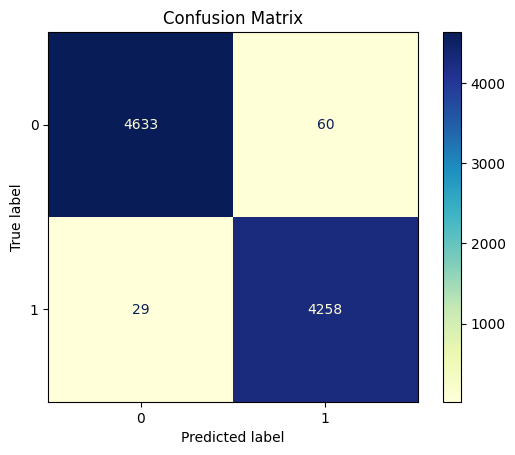

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='YlGnBu')
plt.title("Confusion Matrix")
plt.show()

Conclusion
In this project, we successfully developed a Fake News Detection model using machine learning techniques. The model achieved an impressive 98% accuracy, indicating that it performs exceptionally well in distinguishing between fake and real news articles.
This high accuracy suggests that the model is highly reliable for identifying fake news based on the text data provided. However, there's always room for improvement, and the model could be further enhanced by exploring advanced techniques like ensemble methods or deep learning models to potentially achieve even better performance.
Overall, the project demonstrates the potential of using machine learning to tackle the growing problem of fake news, with the current results showing a strong foundation for practical deployment.